<a href="https://colab.research.google.com/github/fernandabomtorin16/time_serie/blob/main/T1_S%C3%A9rie_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho 1 - Séries temporais

## Nome(s): Fernanda Bomtorin Gomes de Jesus

## Objetivos
A célula abaixo carrega os dados da série tmeporal de CO2 em Mauna Loa (Havaí).

A partir desta série, faça o seguinte:

1 - Use uma transformada de Fourier para encontrar a sazonalidade

2 - Calcule uma linha de tendência para os dados

2.1 - É melhor usar uma linha de tendência linear ou exponencial para esses dados?

2.2 - Faria sentido calcular a linha de tendência descartando os dados muito antigos e usar só a parte mais nova?

3 - A série vai até o fim de 2001. Use os dados anteriores a 1995 como treino e faça a previsão da série entre 1996 e 2001 com os seguintes métodos, comparando seus resultados:

3.1 - Tendência + seasonal naive

3.2 - SARIMA






Série original: <class 'pandas.core.frame.DataFrame'>

--- Primeiras 5 linhas ---
              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4

--- Últimas 5 linhas ---
              co2
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

--- Série reamostrada e interpolada (Mensal) ---

--- Primeiras 5 linhas ---
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    316.529167
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

--- Últimas 5 linhas ---
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, dtype: float64


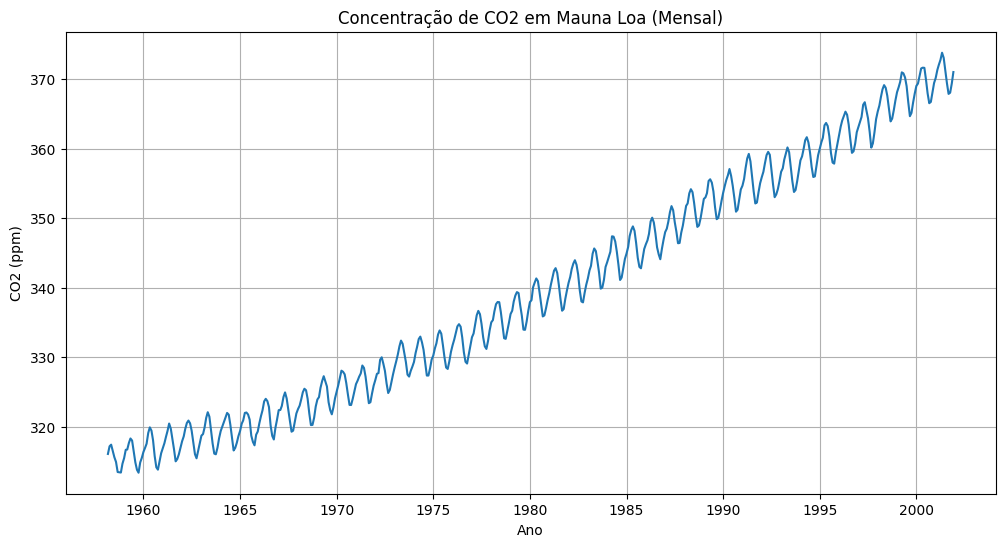

In [97]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar o conjunto de dados
# O statsmodels possui um carregador específico para este dataset
data = sm.datasets.co2.load_pandas()

# O objeto 'data' contém várias informações.
# Os dados da série temporal estão em 'data.data'
series = data.data

# 2. Inspecionar os dados
print("Série original:", type(series))
print("\n--- Primeiras 5 linhas ---")
print(series.head())
print("\n--- Últimas 5 linhas ---")
print(series.tail())

# 3. Pré-processamento (Importante para este dataset)
# O dataset original tem medições semanais e alguns valores ausentes (NaN).
# Para a maioria das análises de série temporal, você vai querer
# reamostrar para uma frequência mensal ('MS' - Month Start)
# e interpolar os valores ausentes.

# Reamostrar para frequência mensal, pegando a média do mês
series_mensal = series['co2'].resample('MS').mean()

# A série tem valores NaN que precisam ser preenchidos.
# A interpolação linear é uma abordagem comum.
series_mensal = series_mensal.interpolate(method='linear')

print("\n--- Série reamostrada e interpolada (Mensal) ---")
print("\n--- Primeiras 5 linhas ---")
print(series_mensal.head())
print("\n--- Últimas 5 linhas ---")
print(series_mensal.tail())

# 4. Visualizar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(series_mensal)
plt.title('Concentração de CO2 em Mauna Loa (Mensal)')
plt.xlabel('Ano')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.show()

# Transformada de Fourier

Utilização da transformada de Fourier para encontrar a sazonalidade da serie.

In [98]:
series_mensal[:10].sort_index()

,co2
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,316.529167
1958-07-01,315.625000
1958-08-01,314.950000
1958-09-01,313.500000
1958-10-01,313.462500
1958-11-01,313.425000
1958-12-01,314.700000


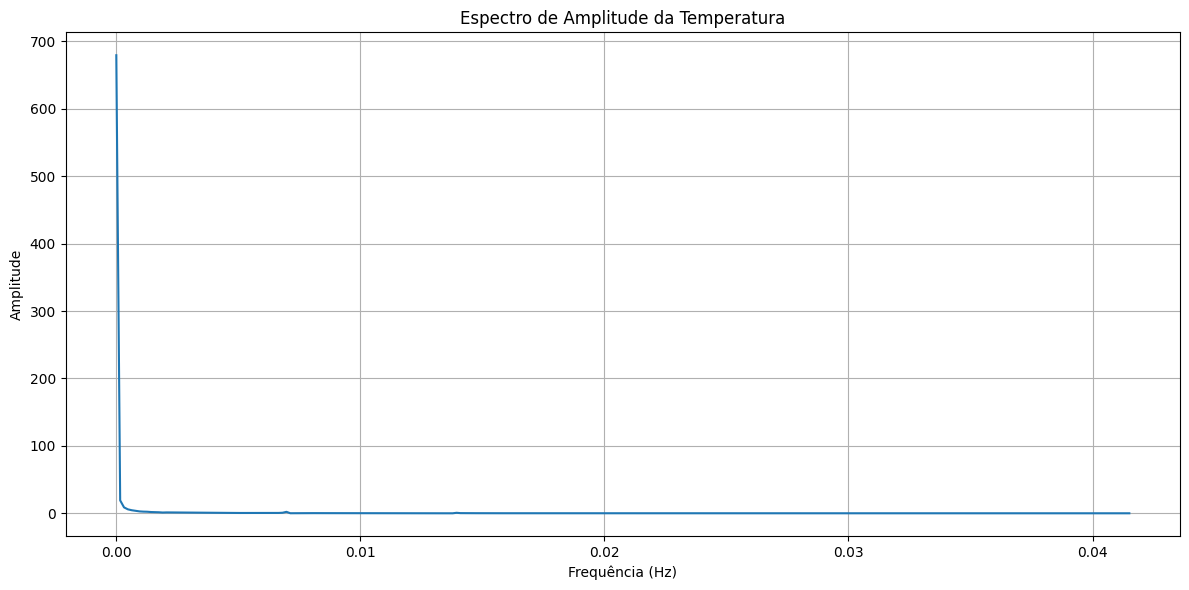

In [99]:
import numpy as np

# Selecionar e preparar os dados
co2 = series_mensal.values

# Calcular o intervalo de tempo entre as amostras (em meses)
# Os dados são registrados a cada 1 mês
intervalo_de_amostragem = 12 # meses

# # # Calcular a frequência de amostragem (Fs)
taxa_de_amostragem = 1.0 / intervalo_de_amostragem # Hz

# Calcular a FFT
transformada_temperatura = np.fft.fft(co2)
N_temp = len(co2) # Número de pontos

# Calcular o espectro de amplitude
espectro_amplitude_temperatura = 2.0/N_temp * np.abs(transformada_temperatura[:N_temp//2])

# Obter as frequências correspondentes
# A frequência de Nyquist é Fs/2
frequencias_temperatura = np.fft.fftfreq(N_temp, d=intervalo_de_amostragem)[:N_temp//2]


# Visualizar o espectro de amplitude (apenas frequências positivas)
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(frequencias_temperatura, espectro_amplitude_temperatura)
ax.set_title('Espectro de Amplitude da Temperatura')
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid(True)

plt.tight_layout()
plt.show()

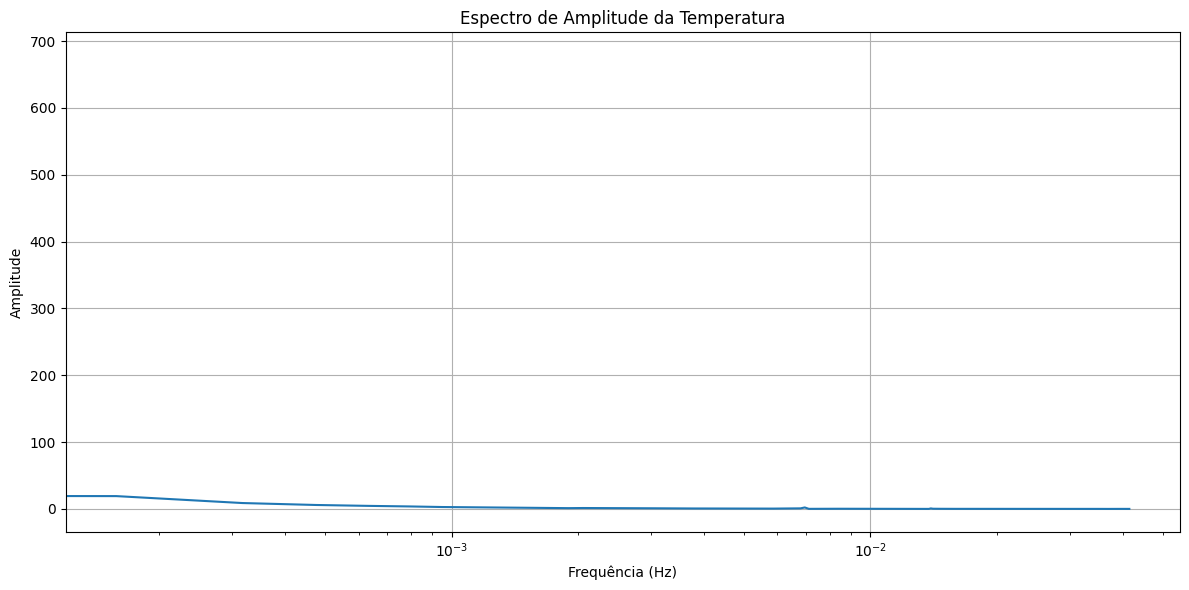

In [100]:

# Visualizar o espectro de amplitude (apenas frequências positivas)
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(frequencias_temperatura, espectro_amplitude_temperatura)
ax.set_title('Espectro de Amplitude da Temperatura')
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_xscale('log')
#ax.set_yscale('log')

plt.tight_layout()
plt.show()

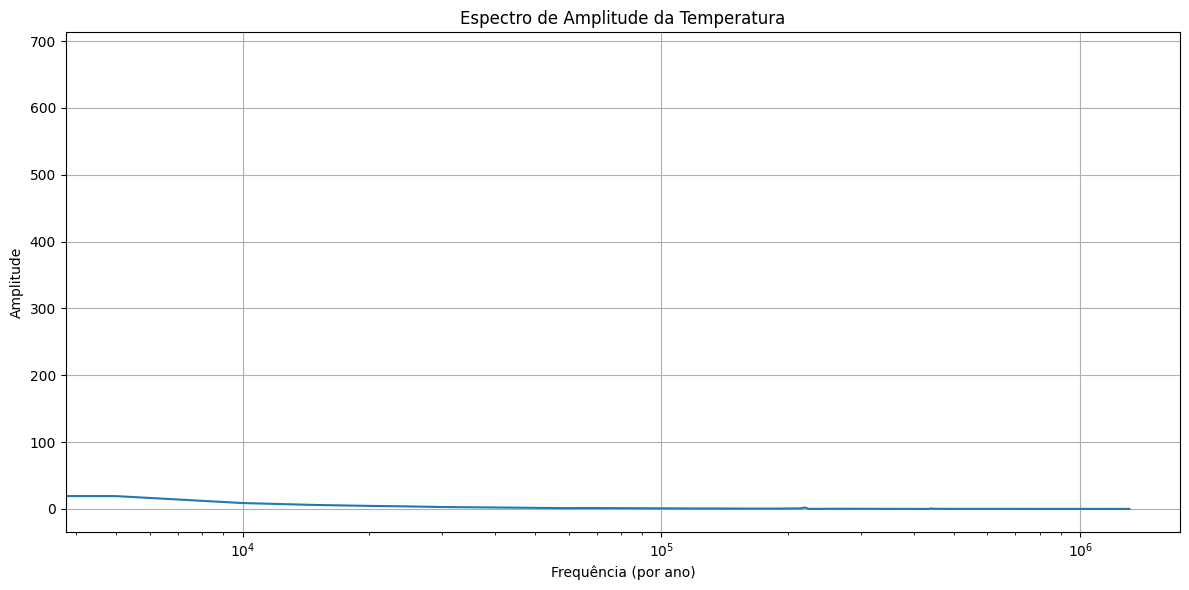

In [101]:
# Visualizar o espectro de amplitude (apenas frequências positivas)
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(frequencias_temperatura*(365*60*60*24), espectro_amplitude_temperatura)
ax.set_title('Espectro de Amplitude da Temperatura')
ax.set_xlabel('Frequência (por ano)')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_xscale('log')
#ax.set_yscale('log')

plt.tight_layout()
plt.show()

# Tendência

Calculo da linha de tendencia da serie, utilizando o metodo dos minimos quadrados e minimos quadrados com tranformação logaritmica, de forma a compreender qual a melhor abordagem.

### **1 - Tendencia usando Mínimos Quadrados**

Coeficientes (Inclinação β1, Intercepto β0): [1.11158799e-01 3.10440017e+02]


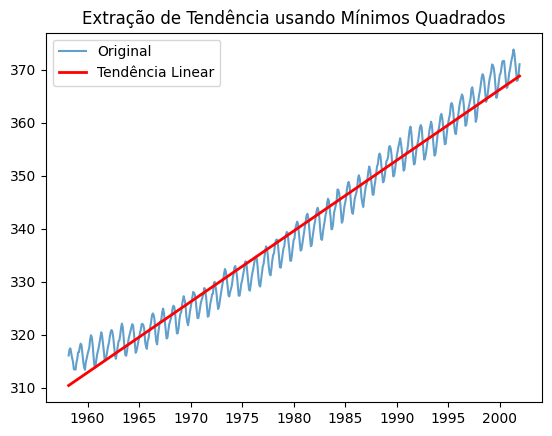

In [102]:
# 1. Preparar os dados para a regressão
# X é uma sequência numérica representando o tempo (0, 1, 2, ..., N-1)
X = np.arange(len(series_mensal))
# Y são os valores da nossa série temporal
y = series_mensal.values

# 2. Ajustar o modelo de regressão linear (Polinômio de grau 1)
# np.polyfit encontra os coeficientes que minimizam o erro quadrático
coeficientes = np.polyfit(X, y, 1)
print(f"Coeficientes (Inclinação β1, Intercepto β0): {coeficientes}")

# 3. Gerar a linha de tendência usando os coeficientes encontrados
tendencia_mq = np.polyval(coeficientes, X)

# 4. Plotar o resultado
plt.plot(series_mensal.index, series_mensal.values, label='Original', alpha=0.7)
# Usamos series_mensal.index para garantir que o eixo X esteja correto com as datas
plt.plot(series_mensal.index, tendencia_mq, label='Tendência Linear', color='red', linewidth=2)
plt.title('Extração de Tendência usando Mínimos Quadrados')
plt.legend()
plt.show()

### 2 - Mínimos Quadrados com transformação logarítima

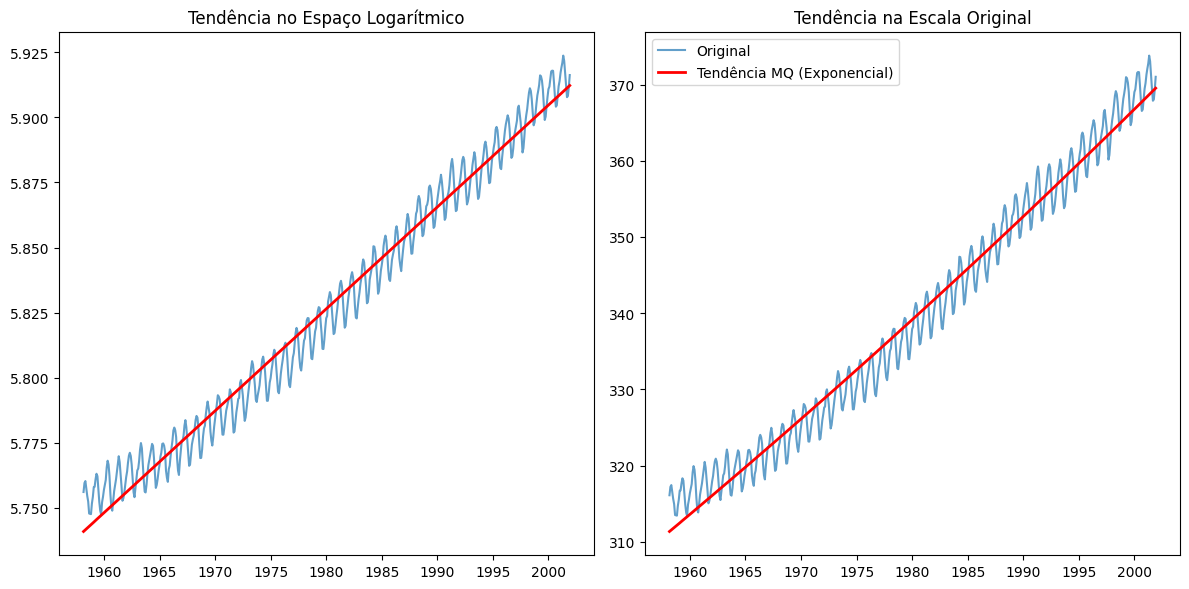

In [103]:
# 1. Aplicar a transformação logarítmica nos dados
series_mensal_log = np.log(series_mensal)
y_log = series_mensal_log.values

# 2. Ajustar o MQ nos dados transformados
coeficientes_log = np.polyfit(X, y_log, 1)

# 3. Gerar a linha de tendência no espaço logarítmico e reverter para a escala original (exponencial)
tendencia_mq_log = np.polyval(coeficientes_log, X)
tendencia_mq_exp = np.exp(tendencia_mq_log)

# 4. Plotar o resultado
plt.figure(figsize=(12, 6))

# Plot no espaço Log
plt.subplot(1, 2, 1)
plt.plot(series_mensal.index, y_log, alpha=0.7)
plt.plot(series_mensal.index, tendencia_mq_log, color='red', linewidth=2)
plt.title('Tendência no Espaço Logarítmico')

# Plot na escala Original
plt.subplot(1, 2, 2)
plt.plot(series_mensal.index, series_mensal.values, label='Original', alpha=0.7)
plt.plot(series_mensal.index, tendencia_mq_exp, label='Tendência MQ (Exponencial)', color='red', linewidth=2)
plt.title('Tendência na Escala Original')
plt.legend()

plt.tight_layout()
plt.show()

### **3 - Utilizando apenas dados mais recentes**

Como podemos observar, em ambos os casos, o calculo da tendencia não foi muito bem sucedido. Desta forma, opta-se em utilizar apenas os dados da última decada para o calculo.

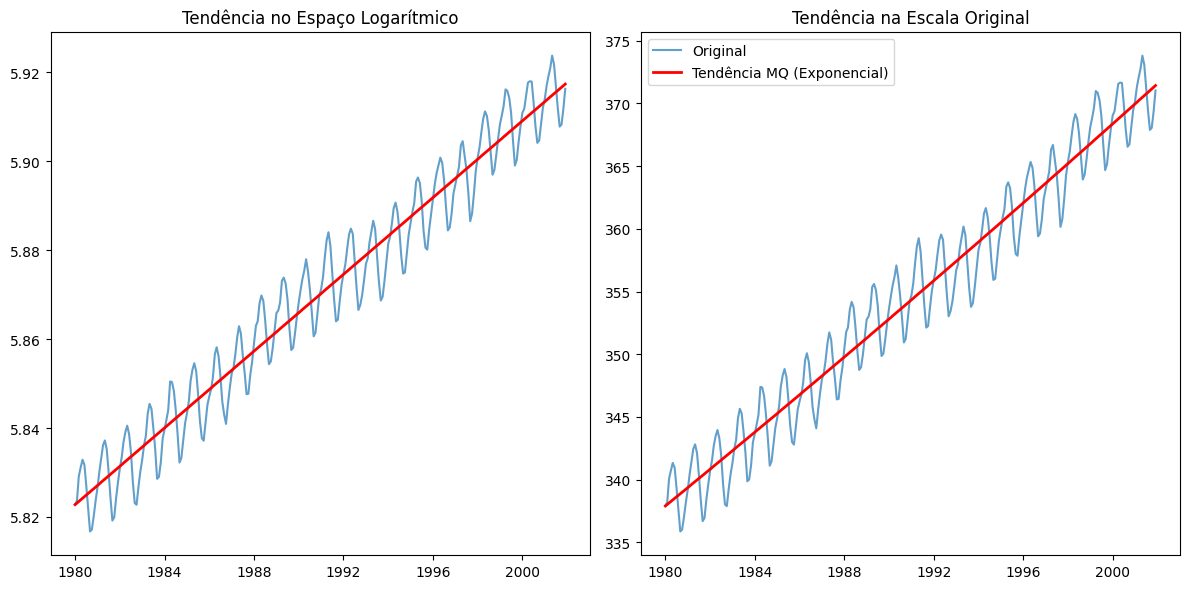

In [104]:
series_recente = series_mensal['1980-01-01':]
X_recente = np.arange(len(series_recente))

# 1. Aplicar a transformação logarítmica nos dados
series_recente_log = np.log(series_recente)
y_log = series_recente_log.values

# 2. Ajustar o MQ nos dados transformados
coeficientes_log = np.polyfit(X_recente, y_log, 1)

# 3. Gerar a linha de tendência no espaço logarítmico e reverter para a escala original (exponencial)
tendencia_mq_log = np.polyval(coeficientes_log, X_recente)
tendencia_mq_exp = np.exp(tendencia_mq_log)

# 4. Plotar o resultado
plt.figure(figsize=(12, 6))

# Plot no espaço Log
plt.subplot(1, 2, 1)
plt.plot(series_recente.index, y_log, alpha=0.7)
plt.plot(series_recente.index, tendencia_mq_log, color='red', linewidth=2)
plt.title('Tendência no Espaço Logarítmico')

# Plot na escala Original
plt.subplot(1, 2, 2)
plt.plot(series_recente.index, series_recente.values, label='Original', alpha=0.7)
plt.plot(series_recente.index, tendencia_mq_exp, label='Tendência MQ (Exponencial)', color='red', linewidth=2)
plt.title('Tendência na Escala Original')
plt.legend()

plt.tight_layout()
plt.show()

# **Predições do modelo**

A partir da serie, utiliza-se os dados anteriores a 1995 como treino e é realizada a previsão da série entre 1996 e 2001 com os métodos:

a - Tendência + seasonal naive

b - SARIMA

### **a - Tendência + seasonal naive**

In [105]:
train[N_test:]

,co2


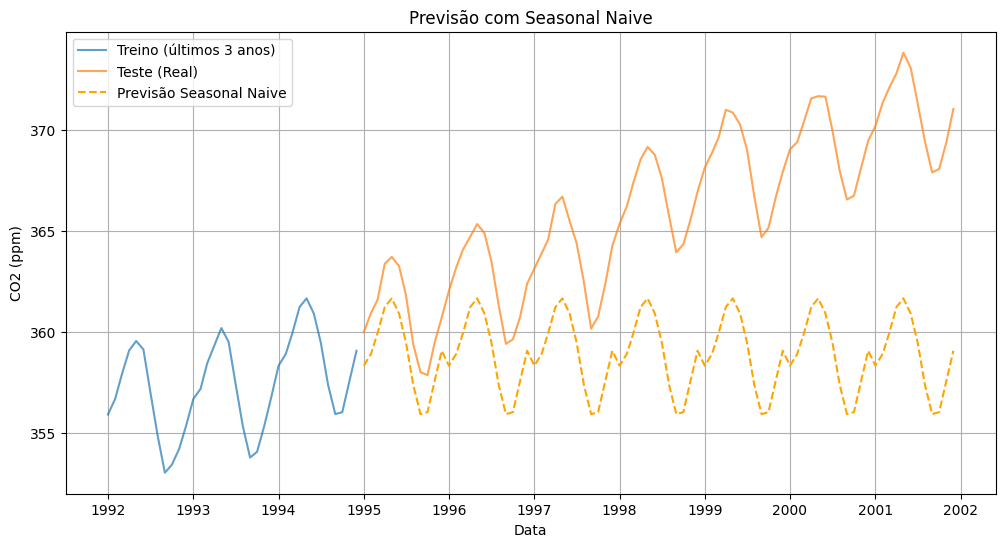

MAE do Seasonal Naive: 7.16


In [113]:
from sklearn.metrics import mean_absolute_error

# Dividindo os dados em treino e teste (últimos 12 meses como teste)
# A série vai até o fim de 2001. Usar dados anteriores a 1995 como treino
train_end_date = '1994-12-31' # Fim do treino
test_start_date = '1995-01-01' # Início do teste

train = series_mensal[:train_end_date]
test = series_mensal[test_start_date:]

# Implementando o Seasonal Naive
# A previsão para o período de teste (1996 a 2001) são os 12 meses anteriores a 1995 (ou seja, 1994),
# repetidos para cobrir todo o período de teste.
# Precisamos dos últimos 12 meses do conjunto de treino.
last_12_months_of_train = train.tail(12)

# Criar a previsão repetindo os últimos 12 meses do treino
# O número de repetições é o comprimento do teste dividido por 12.
num_test_months = len(test)
num_repeats = num_test_months // 12 # Usar divisão inteira

s_naive_forecast_values = np.tile(last_12_months_of_train.values, num_repeats)

# Se o número de meses no teste não for um múltiplo de 12, adicione os meses restantes
remaining_months = num_test_months % 12
if remaining_months > 0:
    s_naive_forecast_values = np.concatenate((s_naive_forecast_values, last_12_months_of_train.values[:remaining_months]))


# Criar a série pandas para a previsão com o índice correto
s_naive_forecast = pd.Series(s_naive_forecast_values, index=test.index)


# Plotando o resultado
plt.figure(figsize=(12, 6))
plt.plot(train.tail(36), label='Treino (últimos 3 anos)', alpha=0.7) # Mostrando os últimos 3 anos para contexto
plt.plot(test, label='Teste (Real)', alpha=0.7)
plt.plot(s_naive_forecast, label='Previsão Seasonal Naive', linestyle='--', color='orange')
plt.title('Previsão com Seasonal Naive')
plt.xlabel('Data')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Avaliação
mae_snaive = mean_absolute_error(test, s_naive_forecast)
print(f"MAE do Seasonal Naive: {mae_snaive:.2f}")

### **b - SARIMA**

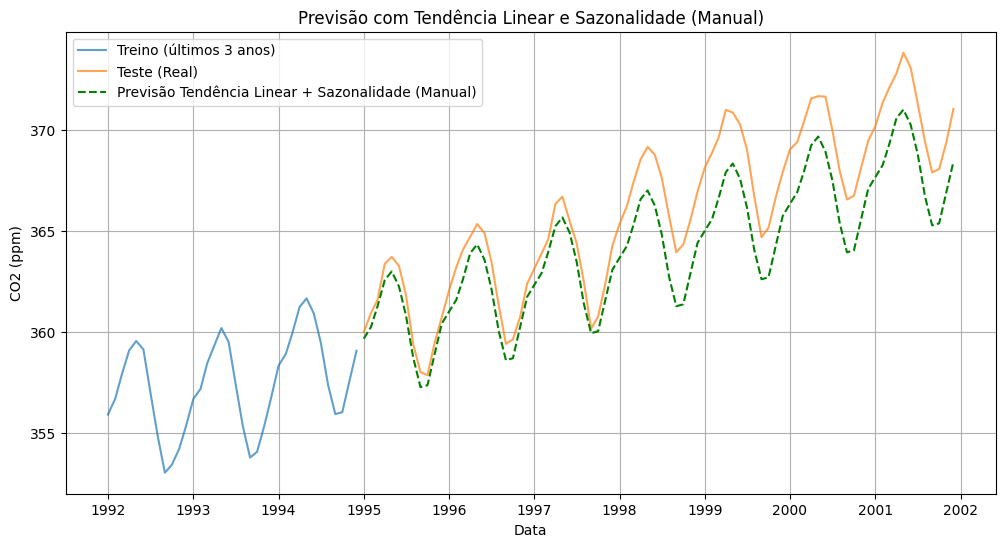

MAE do modelo Tendência Linear + Sazonalidade (Manual): 1.83


In [117]:
# Começando pelos dados sem a transformação logarítmica

# 1. Ajustar a tendência (usando o modelo linear encontrado anteriormente)
# X já foi definido como np.arange(len(series_recente))
# coeficientes já foram calculados
# Precisamos recalcular a tendência para toda a série mensal original (series_mensal)
# para poder dividir em treino e teste usando os mesmos índices.
X_completo = np.arange(len(series_mensal))
tendencia_linear_completa = np.polyval(coeficientes, X_completo)

# Dividir a tendência em treino e teste usando os mesmos índices das séries originais
# Encontrar os índices onde a série de treino e teste começam e terminam
train_end_date = '1994-12-01' # Corrigido para Month Start
test_start_date = '1995-01-01' # Início do teste

train = series_mensal[:train_end_date]
test = series_mensal[test_start_date:]

train_end_index = series_mensal.index.get_loc(train_end_date)
test_start_index = series_mensal.index.get_loc(test_start_date)

tendencia_train = tendencia_linear_completa[:train_end_index + 1] # Inclui o último ponto do treino
tendencia_test = tendencia_linear_completa[test_start_index:]


# 2. Subtrair a tendência dos dados de treino para obter os resíduos (componente sazonal + erro)
# Certifique-se de que train e tendencia_train tenham o mesmo índice para a subtração
residuos_train = train - tendencia_train

# 3. Implementar o Seasonal Naive nos resíduos de treino
# A previsão para o período de teste são os últimos 12 resíduos de treino, repetidos.
last_12_residuos_train = residuos_train.tail(12)

# Criar a previsão de resíduos repetindo os últimos 12 meses dos resíduos de treino
num_test_months = len(test)
num_repeats = num_test_months // 12
s_naive_residuos_forecast_values = np.tile(last_12_residuos_train.values, num_repeats)

remaining_months = num_test_months % 12
if remaining_months > 0:
     s_naive_residuos_forecast_values = np.concatenate((s_naive_residuos_forecast_values, last_12_residuos_train.values[:remaining_months]))

s_naive_residuos_forecast = pd.Series(s_naive_residuos_forecast_values, index=test.index)


# 4. Adicionar a tendência de volta à previsão sazonal
# Previsão final = Previsão Sazonal nos Resíduos + Tendência Prevista (que é a mesma tendência linear)
# Certifique-se de que s_naive_residuos_forecast e tendencia_test tenham o mesmo índice para a soma
forecast_tendencia_sazonal_linear = s_naive_residuos_forecast + tendencia_test

# Plotando o resultado
plt.figure(figsize=(12, 6))
plt.plot(train.tail(36), label='Treino (últimos 3 anos)', alpha=0.7) # Mostrando os últimos 3 anos para contexto
plt.plot(test, label='Teste (Real)', alpha=0.7)
plt.plot(forecast_tendencia_sazonal_linear, label='Previsão Tendência Linear + Sazonalidade (Manual)', linestyle='--', color='green')
plt.title('Previsão com Tendência Linear e Sazonalidade (Manual)')
plt.xlabel('Data')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Avaliação
mae_tendencia_sazonal_linear = mean_absolute_error(test, forecast_tendencia_sazonal_linear)
print(f"MAE do modelo Tendência Linear + Sazonalidade (Manual): {mae_tendencia_sazonal_linear:.2f}")

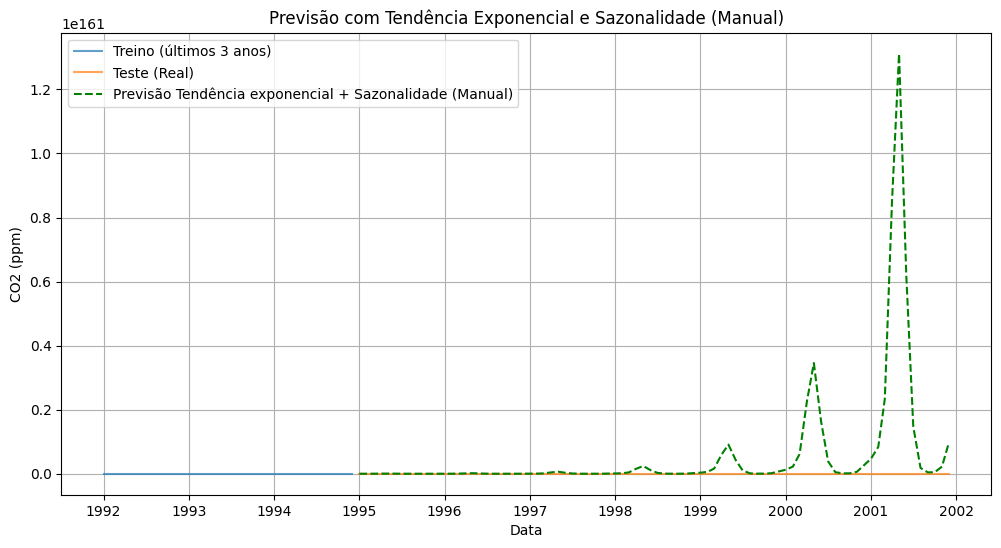

MAE do modelo Tendência Linear + Sazonalidade (Manual): 1.83


In [119]:
# Repetindo para os dados com a transformação logarítmica (tendência exponencial)
# 1. Ajustar a tendência (usando o modelo linear encontrado anteriormente)
# X já foi definido como np.arange(len(series_recente))
# coeficientes já foram calculados
# Precisamos recalcular a tendência para toda a série mensal original (series_mensal)
# para poder dividir em treino e teste usando os mesmos índices.
X_completo = np.arange(len(series_mensal))
tendencia_linear_completa = np.polyval(coeficientes, X_completo)

# Dividir a tendência em treino e teste usando os mesmos índices das séries originais
# Encontrar os índices onde a série de treino e teste começam e terminam
train_end_date = '1994-12-01' # Corrigido para Month Start
test_start_date = '1995-01-01' # Início do teste

train = series_mensal[:train_end_date]
test = series_mensal[test_start_date:]

train_end_index = series_mensal.index.get_loc(train_end_date)
test_start_index = series_mensal.index.get_loc(test_start_date)

tendencia_train = tendencia_linear_completa[:train_end_index + 1] # Inclui o último ponto do treino
tendencia_test = tendencia_linear_completa[test_start_index:]


# 2. Subtrair a tendência dos dados de treino para obter os resíduos (componente sazonal + erro)
# Certifique-se de que train e tendencia_train tenham o mesmo índice para a subtração
residuos_train = train - tendencia_train

# 3. Implementar o Seasonal Naive nos resíduos de treino
# A previsão para o período de teste são os últimos 12 resíduos de treino, repetidos.
last_12_residuos_train = residuos_train.tail(12)

# Criar a previsão de resíduos repetindo os últimos 12 meses dos resíduos de treino
num_test_months = len(test)
num_repeats = num_test_months // 12
s_naive_residuos_forecast_values = np.tile(last_12_residuos_train.values, num_repeats)

remaining_months = num_test_months % 12
if remaining_months > 0:
     s_naive_residuos_forecast_values = np.concatenate((s_naive_residuos_forecast_values, last_12_residuos_train.values[:remaining_months]))

s_naive_residuos_forecast = pd.Series(s_naive_residuos_forecast_values, index=test.index)

# 4. Adicionar a tendência de volta à previsão sazonal
# Previsão final = Previsão Sazonal nos Resíduos + Tendência Prevista (que é a mesma tendência exponencial)
forecast_tendencia_sazonal_exp = np.exp(s_naive_residuos_forecast + tendencia_test)

# Plotando o resultado
plt.figure(figsize=(12, 6))
plt.plot(train.tail(36), label='Treino (últimos 3 anos)', alpha=0.7) # Mostrando os últimos 3 anos para contexto
plt.plot(test, label='Teste (Real)', alpha=0.7)
plt.plot(forecast_tendencia_sazonal_exp, label='Previsão Tendência exponencial + Sazonalidade (Manual)', linestyle='--', color='green')
plt.title('Previsão com Tendência Exponencial e Sazonalidade (Manual)')
plt.xlabel('Data')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Avaliação
mae_tendencia_sazonal_linear = mean_absolute_error(test, forecast_tendencia_sazonal_linear)
print(f"MAE do modelo Tendência Linear + Sazonalidade (Manual): {mae_tendencia_sazonal_linear:.2f}")